---
**Desafio 1: Pesquisar sobre intervalo de confiança <br>
Desafio 2: Testar outros parâmetros da árvore de decisão <br>
Desafio 3: Procurar outras formas de realizar os ajustes de parâmetros com o sklearn <br>
Desafio 4: Pesquisar o que é o problema underfit <br>
Desafio 5: Plotar um gráfico com test e train _score**

---

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn import linear_model

dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")


# **Tabela Geral**

In [24]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [25]:
dados.shape

(127380, 136)

In [26]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **Variáveis e Funções**

In [27]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[provas_saida]
x = notas_entrada
y = notas_saida

In [28]:
def regressor_arvore(nivel):
  SEED = 1232
  np.random.seed(SEED)
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error', return_train_score=True)
  
  return ((resultados['train_score']*-1).mean(), (resultados['test_score']*-1).mean())

# **Desafio 1: Pesquisar sobre intervalo de confiança**

É um intervalo de estimativas prováveis para um parâmetro de interesse de uma população. São usados para indicar a confiabilidade de uma estimativa. Uma média fora do intervalo de confiança provavelmente não reflete a verdadeira média populacional, embora possa acontecer.

# **Desafio 2 - Testar outros parâmetros da árvore de decisão**

In [31]:
def regressor_arvore_mod(nivel, num_folhas):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, min_samples_leaf=num_folhas)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['train_score']*-1).mean()} | Teste com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['test_score']*-1).mean()}\n\n")

In [36]:
for i in range(1, 8):
  for j in range(1, 4):
    regressor_arvore_mod(i,j)

Treino com profundidade 1 e nº mínimo de folhas 1 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 1 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 2 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 2 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 3 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 3 = 7857.871770206351


Treino com profundidade 2 e nº mínimo de folhas 1 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 1 = 6556.886287657656


Treino com profundidade 2 e nº mínimo de folhas 2 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 2 = 6556.886287657656


Treino com profundidade 2 e nº mínimo de folhas 3 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 3 = 6556.886287657656


Treino com profundidade 3 e nº mínimo de folhas 1 = 6021.275229419075 | Teste com profundidade 3 e nº mínimo de folhas 1 = 6054.767567442072



O ponto de divisão em qualquer profunidade só será considerado se tivermos um mesmo número de amostras de treinamento como folhas da árvore à esquerda e à direita igual ao parâmetro min_samples_leaf
Isso pode ajudar a suavizar as decisões do modelo, especialmente em problemas de regressão.

# **Desafio 3 - Procurar outras formas de realizar os ajustes de parâmetros com o sklearn**

In [33]:
from sklearn.model_selection import GridSearchCV

base_estimator=DecisionTreeRegressor()
partes = KFold(n_splits = 10, shuffle=True)
# Parâmetros a serem avaliados: profundidade = 1, 2 e 3; número mínimo de folhas = 1, 2 e 4
param_grid = {'max_depth': [1,2,3], 'min_samples_leaf': [1,2,4]}

# Procurando os melhores parãmetros da lista
search = GridSearchCV(base_estimator, param_grid, cv=10)

# Utilizando os melhores parâmetros na CrossValidation
resultados2 = cross_validate(search, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
print(f"Treino = {(resultados2['train_score']*-1).mean()} | Teste = {(resultados2['test_score']*-1).mean()}\n\n")

Treino = 6020.650869912285 | Teste = 6055.177763120732




Busca o melhor resultado dentro de uma lista de parâmetros.

# **Desafio 4 - Pesquisar o que é o problema underfit**

O que eu entendi procurando por underfitting (Desafio 4): <br>
Underfit é um problema de baixa acurácia do modelo quanto aos dados de treino. Acontece por que o modelo é incapaz de capturar a relação entre os dados de treino e de teste. O underfit demonstra que há espaço para melhoria do modelo. Isso pode ser causado pelo modelo ser muito simples (não há expressividade suficiente no input), ter pouca informação de treino, ou baixo número de iterações com os dados de treino. <br>
Para resolver o problema podemos melhorar o modelo, aumentar o tamanho da amostra de treino e/ou o número de vezes que passamos por ela, com o KFold por exemplo. <br>
fontes: <br>
https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html
https://tensorflow.rstudio.com/tutorials/beginners/basic-ml/tutorial_overfit_underfit/
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/


# **Desafio 5 - Plotar um gráfico com test e train _score**

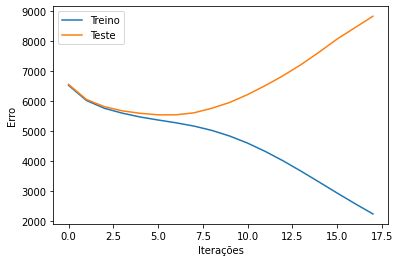

In [18]:
train = []
test = []
for i in range(1, 20):
  a, b = regressor_arvore(i)
  train.append(a)
  test.append(b)

plt.plot(train[1:], label= "Treino")
plt.plot(test[1:], label = "Teste")
plt.ylabel("Erro")
plt.xlabel("Iterações")
plt.legend()

plt.show()

Gráfico mostra claramente o underfitting e overfitting